# Polynomial Regression, 8 May 2020

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

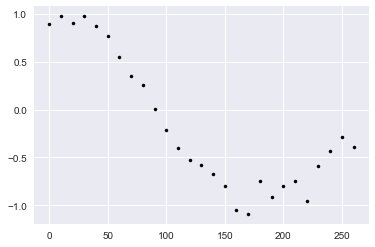

In [19]:
x = np.arange(0, 270, 10)
y = np.cos(x * np.pi/180) + np.random.normal(0, 0.15, len(x))
df = pd.DataFrame({'x': x, 'y': y})
plt.plot(df['x'], df['y'], 'k.')

In [20]:
df.describe()

,x,y
count,27.000000,27.000000
mean,130.000000,-0.171857
std,79.372539,0.708501
min,0.000000,-1.089349
25%,65.000000,-0.746027
50%,130.000000,-0.399166
75%,195.000000,0.447491
max,260.000000,0.974529


In [21]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [22]:
modelA = LinearRegression()
modelB = Ridge()
modelC = Lasso()
modelD = ElasticNet()

modelA.fit(df[['x']], df[['y']])
modelB.fit(df[['x']], df[['y']])
modelC.fit(df[['x']], df[['y']])
modelD.fit(df[['x']], df[['y']])

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [23]:
df['y_A'] = modelA.predict(df[['x']])
df['y_B'] = modelB.predict(df[['x']])
df['y_C'] = modelC.predict(df[['x']])
df['y_D'] = modelD.predict(df[['x']])
df.head(3)

,x,y,y_A,y_B,y_C,y_D
0,0,0.898671,0.786460,0.786455,0.765032,0.775668
1,10,0.974500,0.712744,0.712738,0.692963,0.702781
2,20,0.904481,0.639027,0.639022,0.620895,0.629895


Text(0, 0.5, 'Y')

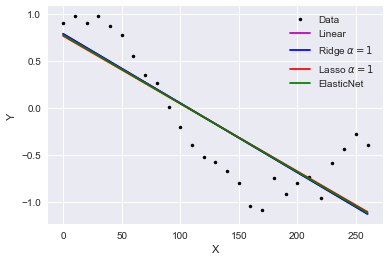

In [24]:
plt.plot(df['x'], df['y'], 'k.')
plt.plot(df['x'], df['y_A'], 'm-')
plt.plot(df['x'], df['y_B'], 'b-')
plt.plot(df['x'], df['y_C'], 'r-')
plt.plot(df['x'], df['y_D'], 'g-')
plt.legend(['Data', 'Linear', r'Ridge $\alpha=1$',
            r'Lasso $\alpha=1$', 'ElasticNet'])
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')

In [25]:
for i in range(2,11):
    df[f'x{i}'] = df['x'] ** i
    
df.head()

,x,y,y_A,y_B,y_C,y_D,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,0,0.898671,0.786460,0.786455,0.765032,0.775668,0,0,0,0,0,0,0,0,0
1,10,0.974500,0.712744,0.712738,0.692963,0.702781,100,1000,10000,100000,1000000,10000000,100000000,1000000000,1410065408
2,20,0.904481,0.639027,0.639022,0.620895,0.629895,400,8000,160000,3200000,64000000,1280000000,-169803776,898891776,797966336
3,30,0.974529,0.565310,0.565306,0.548827,0.557008,900,27000,810000,24300000,729000000,395163520,-1029996288,-835117568,716276736
4,40,0.872846,0.491594,0.491589,0.476758,0.484122,1600,64000,2560000,102400000,-198967296,631242752,-520093696,671088640,1073741824


In [26]:
modelE = LinearRegression()
modelE.fit(df[['x', 'x2']], df[['y']])

df['y_E2'] = modelE.predict(df[['x', 'x2']])
df.head()

,x,y,y_A,y_B,y_C,y_D,x2,x3,x4,x5,x6,x7,x8,x9,x10,y_E2
0,0,0.898671,0.786460,0.786455,0.765032,0.775668,0,0,0,0,0,0,0,0,0,1.439152
1,10,0.974500,0.712744,0.712738,0.692963,0.702781,100,1000,10000,100000,1000000,10000000,100000000,1000000000,1410065408,1.214814
2,20,0.904481,0.639027,0.639022,0.620895,0.629895,400,8000,160000,3200000,64000000,1280000000,-169803776,898891776,797966336,1.002526
3,30,0.974529,0.565310,0.565306,0.548827,0.557008,900,27000,810000,24300000,729000000,395163520,-1029996288,-835117568,716276736,0.802287
4,40,0.872846,0.491594,0.491589,0.476758,0.484122,1600,64000,2560000,102400000,-198967296,631242752,-520093696,671088640,1073741824,0.614099


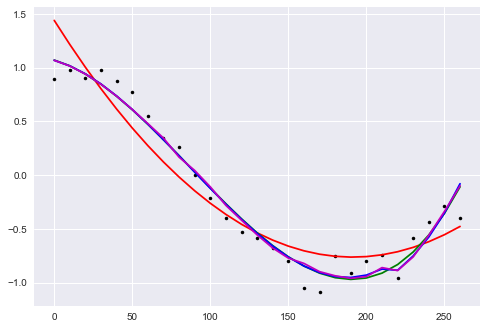

In [27]:
xn = ['x']
for i in range(2, 11):
    xn.append(f'x{i}')
    modelE.fit(df[xn], df['y'])
    df[f'y_E{i}'] = modelE.predict(df[xn])
    
plt.style.use('seaborn')
plt.plot(df['x'], df['y'], 'k.')
plt.plot(df['x'], df['y_E2'], 'r-')
plt.plot(df['x'], df['y_E3'], 'g-')
plt.plot(df['x'], df['y_E4'], 'b-')
plt.plot(df['x'], df['y_E5'], 'm-')

In [28]:
from sklearn.metrics import mean_squared_error
print('RMSE yE2: ', np.sqrt(mean_squared_error(df['y'], df['y_E2'])))
print('RMSE yE3: ', np.sqrt(mean_squared_error(df['y'], df['y_E3'])))
print('RMSE yE4: ', np.sqrt(mean_squared_error(df['y'], df['y_E4'])))
print('RMSE yE5: ', np.sqrt(mean_squared_error(df['y'], df['y_E5'])))
print('RMSE yE6: ', np.sqrt(mean_squared_error(df['y'], df['y_E6'])))
print('RMSE yE7: ', np.sqrt(mean_squared_error(df['y'], df['y_E7'])))
print('RMSE yE8: ', np.sqrt(mean_squared_error(df['y'], df['y_E8'])))
print('RMSE yE9: ', np.sqrt(mean_squared_error(df['y'], df['y_E9'])))
print('RMSE yE10: ', np.sqrt(mean_squared_error(df['y'], df['y_E10'])))

RMSE yE2:  0.21742740076955683
RMSE yE3:  0.13001133389624156
RMSE yE4:  0.12885632766497268
RMSE yE5:  0.1283187447495469
RMSE yE6:  0.1261437706523667
RMSE yE7:  0.12168479092967552
RMSE yE8:  0.12165239187325352
RMSE yE9:  0.12072812051563134
RMSE yE10:  0.11829220380103948


# Polynomial Features

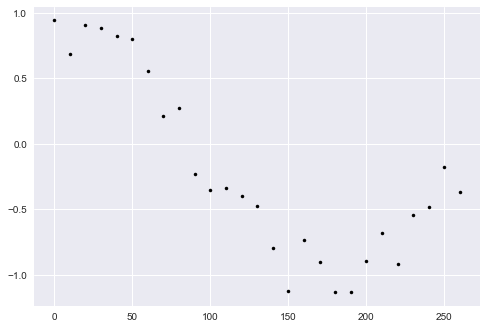

In [29]:
x = np.arange(0, 270, 10)
y = np.cos(x * np.pi/180) + np.random.normal(0, 0.15, len(x))
df = pd.DataFrame({'x': x, 'y': y})
plt.plot(df['x'], df['y'], 'k.')

In [30]:
from sklearn.preprocessing import PolynomialFeatures

a = [2]
apoli = PolynomialFeatures(5, include_bias=False) # untuk tidak mengikutsertakan 2 pangkat nol

apoli.fit_transform([a])

array([[ 2.,  4.,  8., 16., 32.]])

In [31]:
b = [3, 6, 9]

bpoli = PolynomialFeatures(10, include_bias=False)

bp = bpoli.fit_transform(np.array(b).reshape(-1, 1)).tolist()
pd.DataFrame(bp)

,0,1,2,3,4,5,6,7,8,9
0,3.0,9.0,27.0,81.0,243.0,729.0,2187.0,6561.0,19683.0,5.904900e+04
1,6.0,36.0,216.0,1296.0,7776.0,46656.0,279936.0,1679616.0,10077696.0,6.046618e+07
2,9.0,81.0,729.0,6561.0,59049.0,531441.0,4782969.0,43046721.0,387420489.0,3.486784e+09


In [32]:
df = pd.DataFrame({'c': np.arange(1,11)})

cpoli = PolynomialFeatures(10, include_bias = False)

cp = bpoli.fit_transform(df[['c']])
dfcp = pd.DataFrame(cp)

pd.concat([df, dfcp], axis = 1)

,c,0,1,2,3,4,5,6,7,8,9
0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000e+00,1.000000e+00
1,2,2.0,4.0,8.0,16.0,32.0,64.0,128.0,256.0,5.120000e+02,1.024000e+03
2,3,3.0,9.0,27.0,81.0,243.0,729.0,2187.0,6561.0,1.968300e+04,5.904900e+04
3,4,4.0,16.0,64.0,256.0,1024.0,4096.0,16384.0,65536.0,2.621440e+05,1.048576e+06
4,5,5.0,25.0,125.0,625.0,3125.0,15625.0,78125.0,390625.0,1.953125e+06,9.765625e+06
5,6,6.0,36.0,216.0,1296.0,7776.0,46656.0,279936.0,1679616.0,1.007770e+07,6.046618e+07
6,7,7.0,49.0,343.0,2401.0,16807.0,117649.0,823543.0,5764801.0,4.035361e+07,2.824752e+08
7,8,8.0,64.0,512.0,4096.0,32768.0,262144.0,2097152.0,16777216.0,1.342177e+08,1.073742e+09
8,9,9.0,81.0,729.0,6561.0,59049.0,531441.0,4782969.0,43046721.0,3.874205e+08,3.486784e+09
9,10,10.0,100.0,1000.0,10000.0,100000.0,1000000.0,10000000.0,100000000.0,1.000000e+09,1.000000e+10


# Pipeline

In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, Binarizer

data1 = np.arange(1000, 11000, 1000)

# Uji coba pipeline: stdscaler --> binarizer
pipe = make_pipeline(
    StandardScaler(),
    Binarizer(threshold = 0.525)
)
pipe.fit_transform(data1.reshape(-1, 1))

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.]])

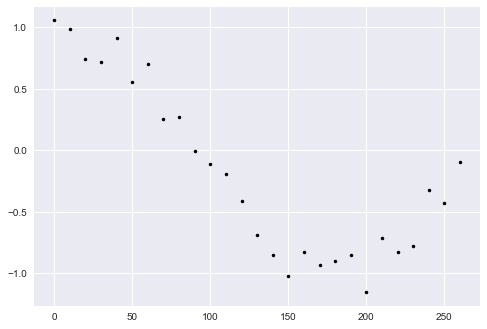

In [34]:
x = np.arange(0, 270, 10)
y = np.cos(x * np.pi/180) + np.random.normal(0, 0.15, len(x))
df = pd.DataFrame({'x': x, 'y': y})
plt.plot(df['x'], df['y'], 'k.')

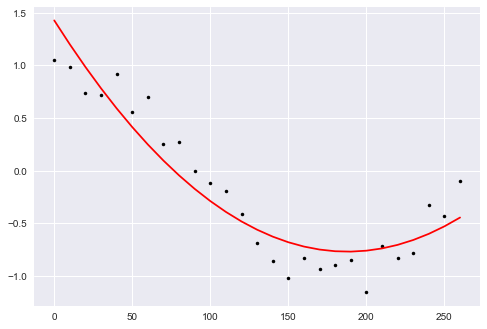

In [35]:
polyReg = make_pipeline(
    PolynomialFeatures(2, include_bias = False),
    LinearRegression()
)

polyReg.fit(df[['x']], df[['y']])

df['y_2'] = polyReg.predict(df[['x']])

plt.plot(df['x'], df['y'], 'k.')
plt.plot(df['x'], df['y_2'], 'r-')

# Latihan

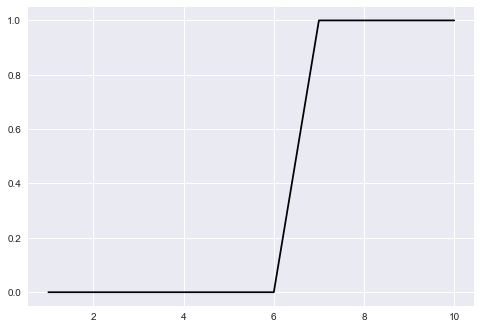

In [36]:
data3 = {
    'x': np.arange(1, 11),
    'y': [0,0,0,0,0,0,1,1,1,1]
}
df4 = pd.DataFrame(data3)
plt.plot(df4['x'], df4['y'], 'k-')

Text(0, 0.5, 'Y')

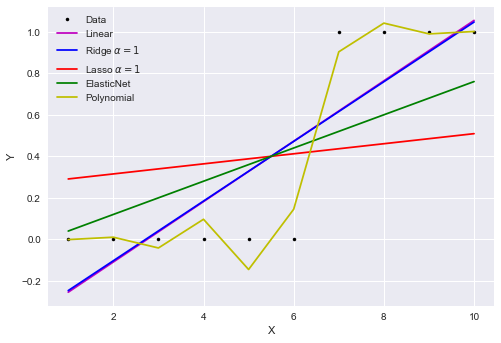

In [37]:
modelA = LinearRegression()
modelB = Ridge()
modelC = Lasso()
modelD = ElasticNet()

modelA.fit(df4[['x']], df4['y'])
modelB.fit(df4[['x']], df4['y'])
modelC.fit(df4[['x']], df4['y'])
modelD.fit(df4[['x']], df4['y'])

polyReg = make_pipeline(
    PolynomialFeatures(8, include_bias=False),
    LinearRegression()
)

polyReg.fit(df4[['x']], df4[['y']])

df4['y"E'] = polyReg.predict(df4[['x']])
df4['y"A'] = modelA.predict(df4[['x']])
df4['y"B'] = modelB.predict(df4[['x']])
df4['y"C'] = modelC.predict(df4[['x']])
df4['y"D'] = modelD.predict(df4[['x']])
df4

plt.plot(df4['x'], df4['y'], 'k.')
plt.plot(df4['x'], df4['y"A'], 'm-')
plt.plot(df4['x'], df4['y"B'], 'b-')
plt.plot(df4['x'], df4['y"C'], 'r-')
plt.plot(df4['x'], df4['y"D'], 'g-')
plt.plot(df4['x'], df4['y"E'], 'y-')
plt.legend([
    'Data', 'Linear', r'Ridge $\alpha=1$', 
    r'Lasso $\alpha=1$', 'ElasticNet', 'Polynomial'
])
plt.grid(True)
plt.xlabel('X'); plt.ylabel('Y')

In [39]:
print('Linear: ', np.sqrt(mean_squared_error(df4['y'], df4['y"A'])))
print('Ridge: ', np.sqrt(mean_squared_error(df4['y'], df4['y"B'])))
print('Lasso: ', np.sqrt(mean_squared_error(df4['y'], df4['y"C'])))
print('ElasticNet: ', np.sqrt(mean_squared_error(df4['y'], df4['y"D'])))
print('Polynomial: ', np.sqrt(mean_squared_error(df4['y'], df4['y"E'])))

Linear:  0.25584085962673253
Ridge:  0.2558897804966631
Lasso:  0.43204937989385733
ElasticNet:  0.31749015732775093
Polynomial:  0.08031202007086825


# **TAKE HOME EXERCISE**
1. Dataset yang digunakan adalah Admission_Predict.csv. X = 'GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', Y = Chance of Admit

2. Buat beberapa percobaan untuk menemukan model MLR terbaik

3. Urutan percobaan 1 (train 80% test 20%):

    1.a) Variabel independent tidak ada intervensi sama sekali + pilihan model (MLR, LASSO, Ridge, ElasticNet, Polynomial)
    
    1.b) Handling outlier + pilihan model (MLR, LASSO, Ridge, ElasticNet, Polynomial)
    
    1.c) Handling outlier + Scalling + pilihan model (MLR, LASSO, Ridge, ElasticNet, Polynomial)
    
4. Urutan percobaan 2 (train 90% test 10%):

    2.a) Variabel independent tidak ada intervensi sama sekali + pilihan model (MLR, LASSO, Ridge, ElasticNet, Polynomial)
    
    2.b) Handle outlier + pilihan model (MLR, LASSO, Ridge, ElasticNet, Polynomial)
    
    2.c) Handling outlier + Scalling   + pilihan model (MLR, LASSO, Ridge, ElasticNet, Polynomial)
    
5. Di setiap percobaan tampilkan MAE, MSE, dan RMSE + Perkembangan secara persentase

## Init

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import metrics

In [30]:
# sns.set_style("darkgrid")
plt.style.use('fivethirtyeight')

## EDA

In [31]:
data = pd.read_csv('Admission_Predict.csv')
data.shape

(400, 9)

In [32]:
data.drop(columns = 'Serial No.', inplace = True)

In [33]:
data.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [34]:
data.rename(columns = {'LOR ': 'LOR', 'Chance of Admit ': 'Chance of Admit'}, inplace = True)
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

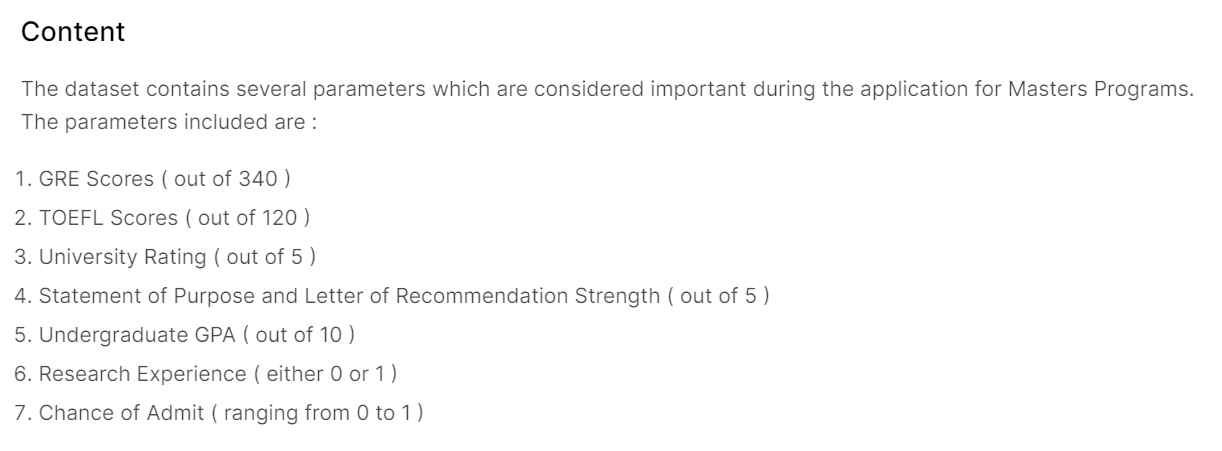

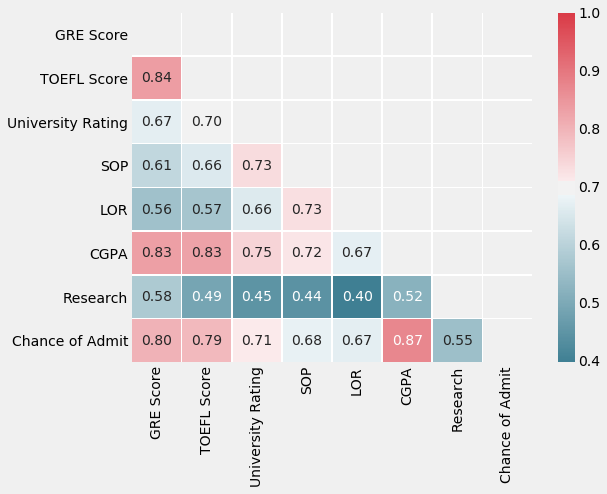

In [35]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 6))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

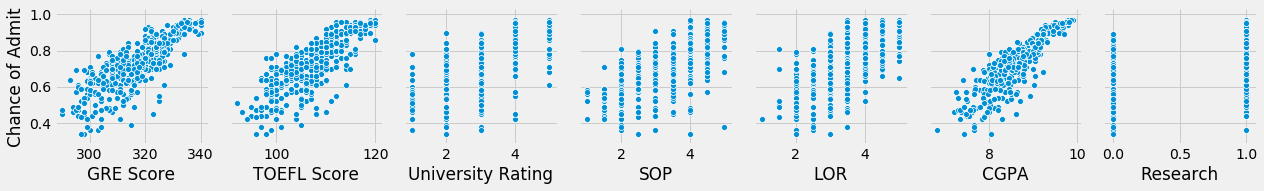

In [36]:
sns.pairplot(data, y_vars = 'Chance of Admit', x_vars = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'])

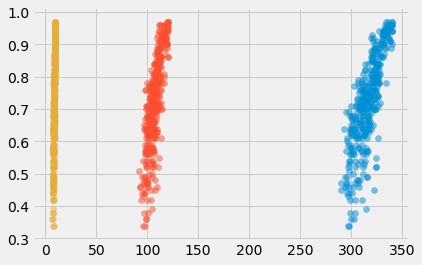

In [37]:
features = ['GRE Score', 'TOEFL Score', 'CGPA']
target = data['Chance of Admit']
for feat in features:
    plt.scatter(data[feat], target, alpha = 0.5)

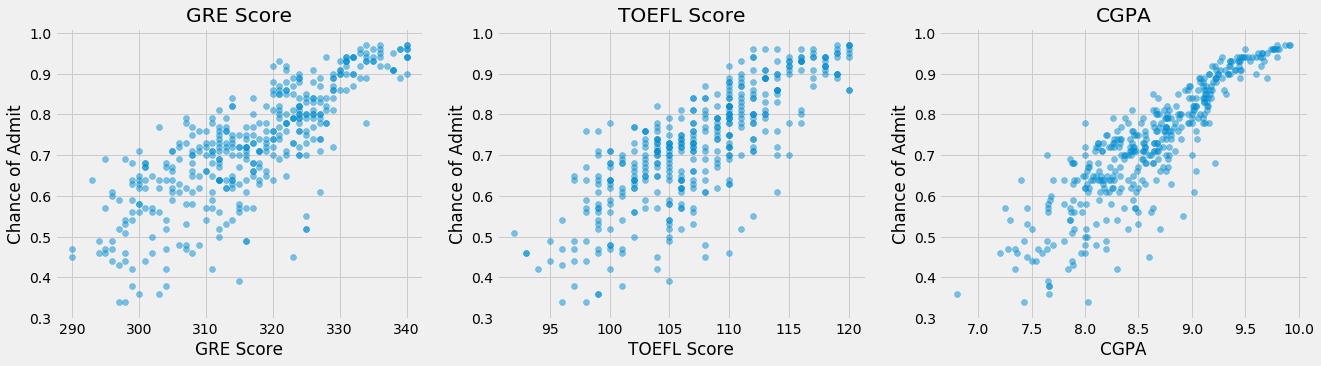

In [38]:
plt.figure(figsize=(20, 5))

features = ['GRE Score', 'TOEFL Score', 'CGPA']
target = data['Chance of Admit']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o', alpha=0.5)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Chance of Admit')


In [39]:
X = data.iloc[:,:7]
y = data.iloc[:,-1].values
fit = SelectKBest(score_func=f_regression, k='all').fit(X, y)
selectkbest = pd.DataFrame(data = zip(X.columns, fit.scores_),
                           columns = ['Feature', 'Score']).nlargest(7, 'Score')
selectkbest

,Feature,Score
5,CGPA,1278.734453
0,GRE Score,720.554243
1,TOEFL Score,667.941156
2,University Rating,407.467332
3,SOP,334.443726
4,LOR,323.996766
6,Research,175.513976


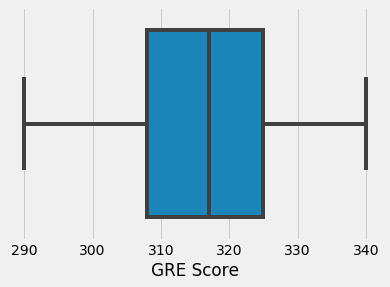

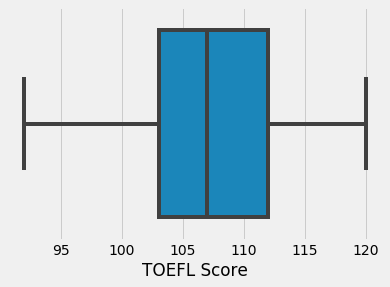

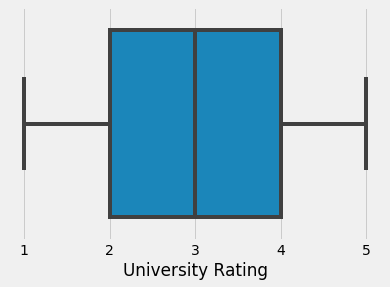

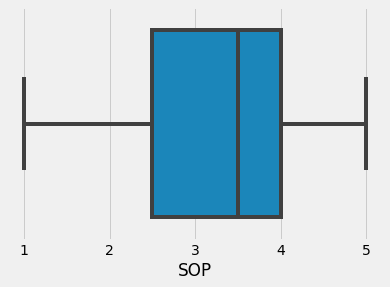

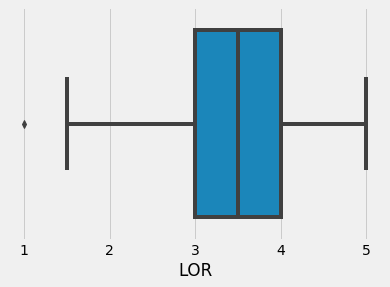

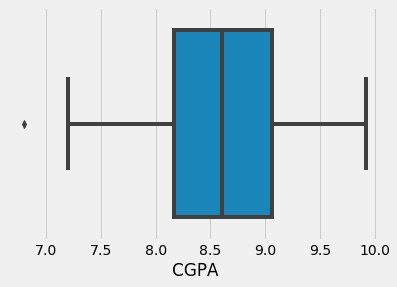

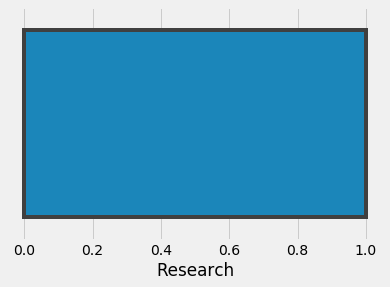

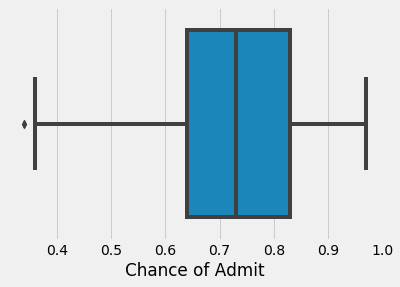

In [53]:
for cols in data.columns:
    sns.boxplot(data[cols])
    plt.show()
    
# noted outliers @ LOR, CGPA, Chance of Admit

In [85]:
def out_iqr(df, col):
    '''Function to identify outliers in a column based on interquantile range (IQR)
       df = Dataset name
       col = Column name'''
    
    q1 = df[col].describe()['25%']
    q3 = df[col].describe()['75%']
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    
    n_out = df[(df[col]<=lower)|(df[col]>=upper)].shape[0]
    n_pct = round(n_out/len(df[col])*100, 2)
    
    return 'n outlier in {}: {} records, {} percent, threshold lower: {} upper: {}'.format(col, n_out, n_pct, lower, upper)

In [86]:
for column in data.columns:
    print(out_iqr(data, column))
    
# LOR below 1.5 OK as long it's not negative
# CGPA below 6.83125 is just unfortunately low achievement but OK as long it's not negative
# Chance of Admit below 0.355 valid as long it's within 0.0 - 1.0 range of probability

n outlier in GRE Score: 0 records, 0.0 percent, threshold lower: 282.5 upper: 350.5
n outlier in TOEFL Score: 0 records, 0.0 percent, threshold lower: 89.5 upper: 125.5
n outlier in University Rating: 0 records, 0.0 percent, threshold lower: -1.0 upper: 7.0
n outlier in SOP: 0 records, 0.0 percent, threshold lower: 0.25 upper: 6.25
n outlier in LOR: 8 records, 2.0 percent, threshold lower: 1.5 upper: 5.5
n outlier in CGPA: 1 records, 0.25 percent, threshold lower: 6.83125 upper: 10.401250000000001
n outlier in Research: 0 records, 0.0 percent, threshold lower: -1.5 upper: 2.5
n outlier in Chance of Admit: 2 records, 0.5 percent, threshold lower: 0.3550000000000001 upper: 1.1149999999999998


In [87]:
data[['LOR', 'CGPA', 'Chance of Admit']].describe()

# decide to keep 'outliers' and it's only 11 records out of 400 anyways

,LOR,CGPA,Chance of Admit
count,400.000000,400.000000,400.000000
mean,3.452500,8.598925,0.724350
std,0.898478,0.596317,0.142609
min,1.000000,6.800000,0.340000
25%,3.000000,8.170000,0.640000
50%,3.500000,8.610000,0.730000
75%,4.000000,9.062500,0.830000
max,5.000000,9.920000,0.970000


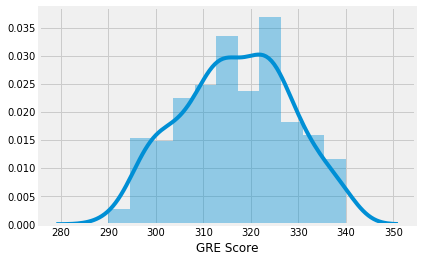

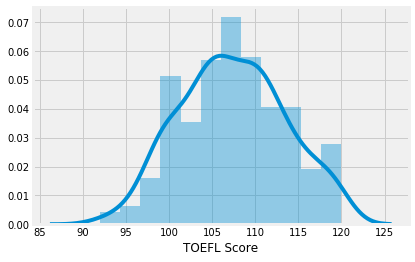

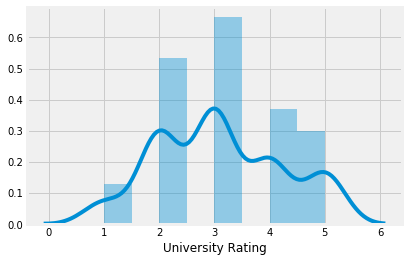

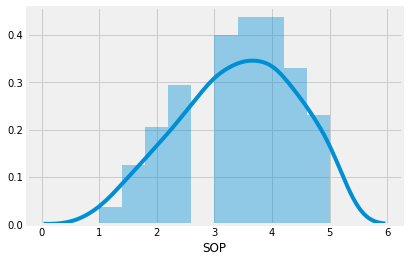

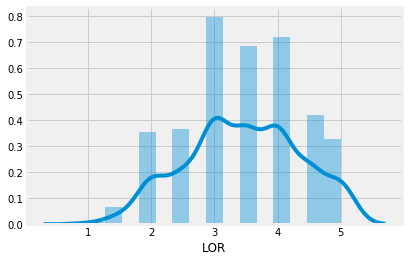

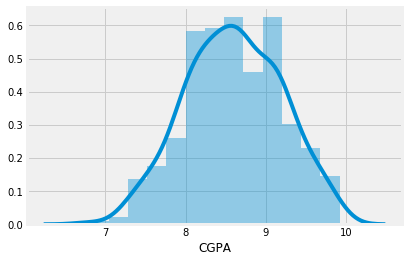

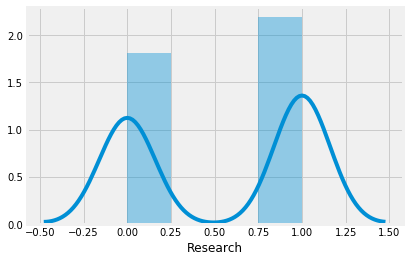

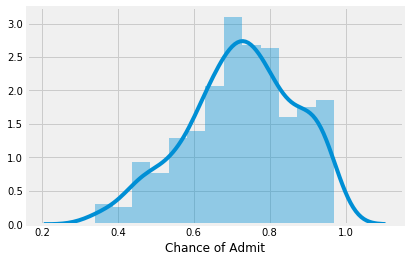

In [104]:
for column in data.columns:
    sns.distplot(data[column])
    plt.show()
    
# looks normal

In [101]:
from scipy.stats import shapiro
def normal_shapiro(df, col, alpha):
    '''Function to identify outliers in a column based on interquantile range (IQR)
       df = Dataset name
       col = Column name
       alpha = Threshold level (float)'''
    
    stat, p = shapiro(df[col])
    print(col)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Distribution looks Gaussian (fail to reject H0)')
    else:
        print('Distribution does not look Gaussian (reject H0)')
    print('\n')

In [102]:
for column in data:
    normal_shapiro(data, column, 0.05)
    
# but statistically only CGPA is normally distributed

GRE Score
Statistics=0.986, p=0.001
Distribution does not look Gaussian (reject H0)


TOEFL Score
Statistics=0.987, p=0.001
Distribution does not look Gaussian (reject H0)


University Rating
Statistics=0.906, p=0.000
Distribution does not look Gaussian (reject H0)


SOP
Statistics=0.956, p=0.000
Distribution does not look Gaussian (reject H0)


LOR
Statistics=0.957, p=0.000
Distribution does not look Gaussian (reject H0)


CGPA
Statistics=0.993, p=0.072
Distribution looks Gaussian (fail to reject H0)


Research
Statistics=0.633, p=0.000
Distribution does not look Gaussian (reject H0)


Chance of Admit
Statistics=0.977, p=0.000
Distribution does not look Gaussian (reject H0)




In [106]:
# let's err on the side of caution and assume failure to pass normality assumption
# outliers are also present

# let's scale our features using RobustScaler

data_robust = pd.DataFrame(RobustScaler().fit_transform(data.iloc[:,:7]), 
                           columns = ['GRE Score', 'TOEFL Score', 'University Rating', 
                                      'SOP', 'LOR', 'CGPA', 'Research']
                          )
data_robust['Chance of Admit'] = data.iloc[:,-1]

data_robust

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.176471,1.222222,0.5,0.666667,1.0,1.165266,0.0,0.92
1,0.411765,0.000000,0.5,0.333333,1.0,0.291317,0.0,0.76
2,-0.058824,-0.333333,0.0,-0.333333,0.0,-0.683473,0.0,0.72
3,0.294118,0.333333,0.0,0.000000,-1.0,0.067227,0.0,0.80
4,-0.176471,-0.444444,-0.5,-1.000000,-0.5,-0.448179,-1.0,0.65
...,...,...,...,...,...,...,...,...
395,0.411765,0.333333,0.0,0.000000,0.0,0.481793,0.0,0.82
396,0.470588,0.000000,0.0,-0.333333,0.0,0.560224,0.0,0.84
397,0.764706,1.000000,0.5,1.000000,1.0,0.941176,0.0,0.91
398,-0.294118,-0.444444,0.0,0.000000,0.5,0.190476,-1.0,0.67


In [119]:
def viz_scaling(ori_dataset, new_dataset, feats):
    '''Function to visualize shape of features' distribution before and after scaling
       ori_dataset  = original dataset name
       new_dataset = new dataset name
       feats = list of features'''
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 7))
    
    ax1.set_title('Before Scaling')
    for feat in feats:
        sns.kdeplot(ori_dataset[feat], ax = ax1)
    
    ax2.set_title('After Scaling')
    for feat in feats:
        sns.kdeplot(new_dataset[feat], ax = ax2)

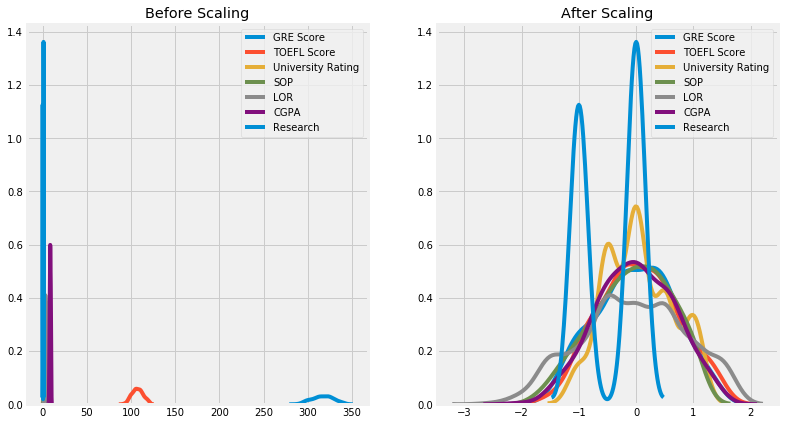

In [120]:
viz_scaling(data, data_robust, ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research'])

## Model Creation

In [40]:
def create_MLR_models(dataset, X, y, test_size):
    '''Creates multivariate linear regression models
    dataset = Dataframe
    X = Feature column names (list)
    y = Target column name (string)
    test_size = Test data size e.g. 0.2'''

    X = dataset[X].values
    y = dataset[y].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 0)
    
    # Regular (multivariate) linear regression
    linear_regression = LinearRegression()
    # Lasso: Linear Model trained with L1 prior as regularizer (aka the Lasso)
    lasso = Lasso()
    # Ridge: Linear least squares with l2 regularization.
    ridge = Ridge()
    # Elastic Net: Linear regression with combined L1 and L2 priors as regularizer.
    elastic_net = ElasticNet()

    models = [linear_regression, lasso, ridge, elastic_net]

    # feed train data to models
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mae = metrics.mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
        r2 = metrics.r2_score(y_test, y_pred)
        target_range = y.max() - y.min()
        nmae = mae/target_range
        nrmse = rmse/target_range

        print(f'Model: {model}')
        print(f'MAE: {round(mae, 4)} ({round(nmae*100, 2)}%)', f'RMSE: {round(rmse, 4)} ({round(nrmse*100, 2)}%)',
              f'R2 Score: {round(r2*100, 2)}%')
        
        plt.plot(X_test, y_test, 'k.')
        plt.plot(X_test, y_pred, 'r.')
        plt.show()
    
    #     global model_metrics
    #     model_metrics.append([mae, rmse, r2, nmae, nrmse])

In [62]:
def create_multivariate_polynomial_regression_model(dataset, X, y, degree, test_size):
    '''Creates a polynomial regression model for the given degree
    dataset = Dataframe
    X = Feature column names (list)
    y = Target column name (string)
    degree = Polynomial features by nth degree (int >= 2)
    test_size = Test data size e.g. 0.2'''
    
    X = dataset[X].values
    y = dataset[y].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 0)
    
    poly = make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=False),
        LinearRegression()
    )
    
    poly.fit(X_train, y_train)
    y_pred = poly.predict(X_test)
    
    mae = metrics.mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    r2 = metrics.r2_score(y_test, y_pred)
    target_range = dataset['Chance of Admit'].max() - dataset['Chance of Admit'].min()
    nmae = mae/target_range
    nrmse = rmse/target_range
    
    print(f'Polynomial Regression Model, dataset={dataset.shape}, degree={degree}')
    print(f'MAE: {round(mae, 4)} ({round(nmae*100, 2)}%)', f'RMSE: {round(rmse, 4)} ({round(nrmse*100, 2)}%)',
          f'R2 Score: {round(r2*100, 2)}%')
    
    plt.plot(X_test, y_test, 'k.')
    plt.plot(X_test, y_pred, 'r.')
    plt.show()

In [63]:
def create_univariate_polynomial_regression_model(dataset, X, y, degree, test_size):
    '''Creates a polynomial regression model for the given degree
    dataset = Dataframe
    X = Feature column name (str)
    y = Target column name (str)
    degree = Polynomial features by nth degree (int >= 2)
    test_size = Test data size e.g. 0.2'''
    
    X = dataset[X].values.reshape(-1, 1)
    y = dataset[y].values.reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 0)
    
    poly = make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=False),
        LinearRegression()
    )
    
    poly.fit(X_train, y_train)
    y_pred = poly.predict(X_test)
    
    mae = metrics.mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    r2 = metrics.r2_score(y_test, y_pred)
    target_range = y.max() - y.min()
    nmae = mae/target_range
    nrmse = rmse/target_range
    
    print(f'Polynomial Regression Model, degree={degree}')
    print(f'MAE: {round(mae, 4)} ({round(nmae*100, 2)}%)', f'RMSE: {round(rmse, 4)} ({round(nrmse*100, 2)}%)',
          f'R2 Score: {round(r2*100, 2)}%')
    
    plt.plot(X_test, y_test, 'k.')
    plt.plot(X_test, y_pred, 'r.')
    plt.show()

## Experiment

### Test Size 20%

#### Raw

Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
MAE: 0.0501 (7.95%) RMSE: 0.0693 (11.0%) R2 Score: 73.55%


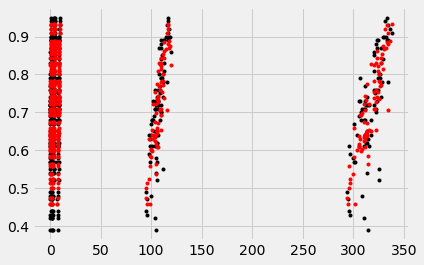

Model: Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
MAE: 0.0889 (14.11%) RMSE: 0.1152 (18.28%) R2 Score: 27.01%


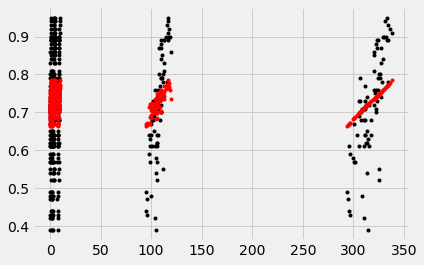

Model: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
MAE: 0.0499 (7.92%) RMSE: 0.0692 (10.98%) R2 Score: 73.65%


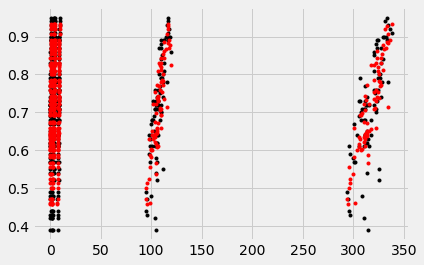

Model: ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
MAE: 0.0717 (11.38%) RMSE: 0.0957 (15.19%) R2 Score: 49.56%


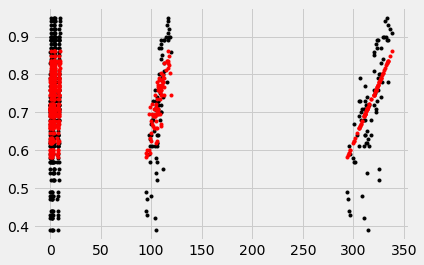

In [41]:
create_MLR_models(dataset = data, 
                  X = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research'], 
                  y = 'Chance of Admit', 
                  test_size = 0.2)

Polynomial Regression Model, dataset=(400, 8), degree=2
MAE: 0.0515 (8.18%) RMSE: 0.0727 (11.54%) R2 Score: 70.89%


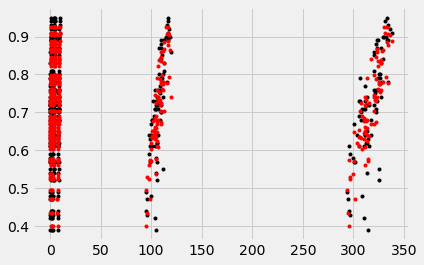

Polynomial Regression Model, dataset=(400, 8), degree=3
MAE: 0.0742 (11.78%) RMSE: 0.1155 (18.34%) R2 Score: 26.55%


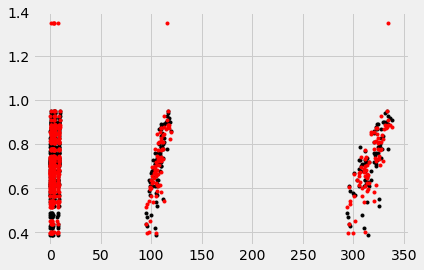

Polynomial Regression Model, dataset=(400, 8), degree=4
MAE: 0.6008 (95.36%) RMSE: 1.357 (215.4%) R2 Score: -10036.59%


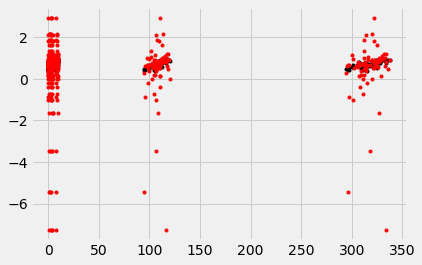

In [65]:
for i in range(2, 5):
    create_multivariate_polynomial_regression_model(dataset = data, 
                                                    X = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 
                                                       'CGPA', 'Research'], 
                                                    y = 'Chance of Admit',
                                                    degree = i,
                                                    test_size = 0.2)

Polynomial Regression Model, degree=2
MAE: 0.0556 (8.82%) RMSE: 0.0769 (12.21%) R2 Score: 67.46%


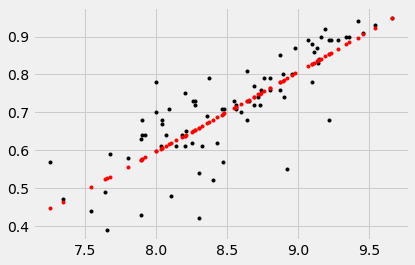

Polynomial Regression Model, degree=3
MAE: 0.0556 (8.82%) RMSE: 0.0769 (12.21%) R2 Score: 67.43%


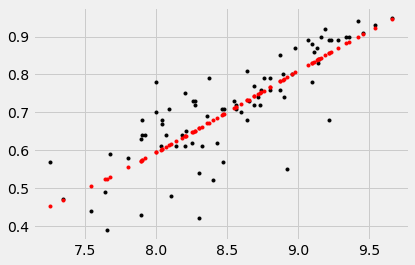

Polynomial Regression Model, degree=4
MAE: 0.055 (8.74%) RMSE: 0.0767 (12.18%) R2 Score: 67.6%


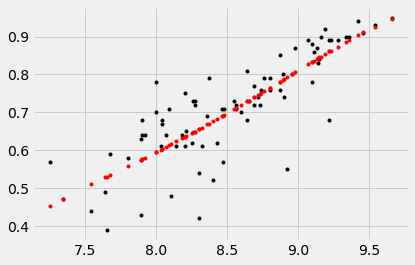

Polynomial Regression Model, degree=5
MAE: 0.0544 (8.64%) RMSE: 0.0764 (12.12%) R2 Score: 67.91%


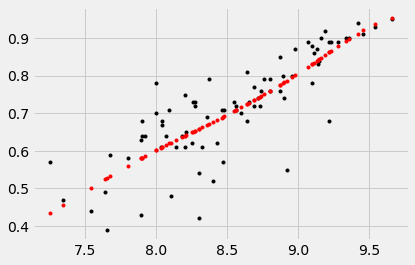

Polynomial Regression Model, degree=6
MAE: 0.0549 (8.72%) RMSE: 0.0765 (12.14%) R2 Score: 67.79%


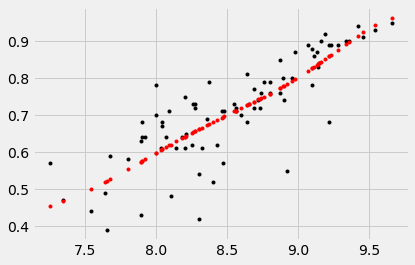

Polynomial Regression Model, degree=7
MAE: 0.0539 (8.56%) RMSE: 0.0756 (12.01%) R2 Score: 68.5%


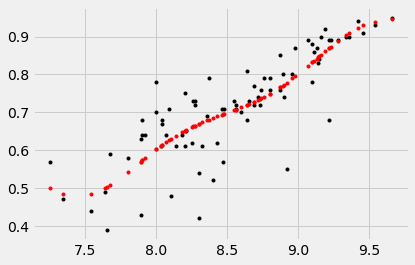

Polynomial Regression Model, degree=8
MAE: 0.0541 (8.59%) RMSE: 0.0758 (12.04%) R2 Score: 68.35%


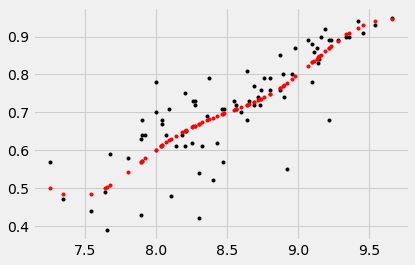

Polynomial Regression Model, degree=9
MAE: 0.0548 (8.7%) RMSE: 0.0764 (12.13%) R2 Score: 67.85%


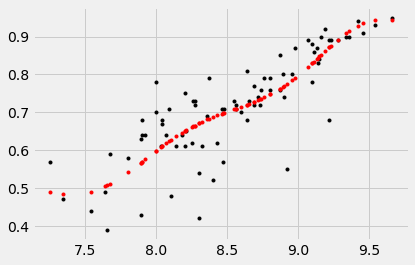

Polynomial Regression Model, degree=10
MAE: 0.0547 (8.68%) RMSE: 0.0763 (12.12%) R2 Score: 67.93%


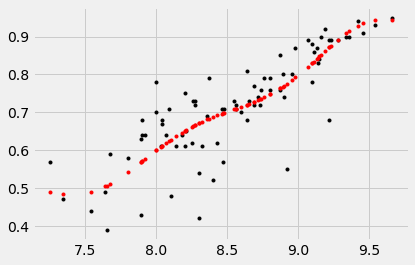

In [66]:
for i in range(2, 11):
    create_univariate_polynomial_regression_model(dataset=data, X='CGPA', y='Chance of Admit', degree=i, test_size=0.2)

#### Scaled

Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
MAE: 0.0501 (7.95%) RMSE: 0.0693 (11.0%) R2 Score: 73.55%


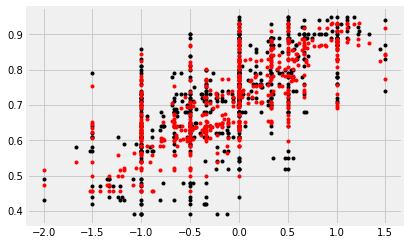

Model: Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
MAE: 0.1075 (17.06%) RMSE: 0.1353 (21.47%) R2 Score: -0.73%


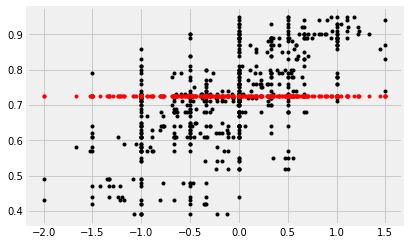

Model: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
MAE: 0.05 (7.93%) RMSE: 0.0692 (10.98%) R2 Score: 73.65%


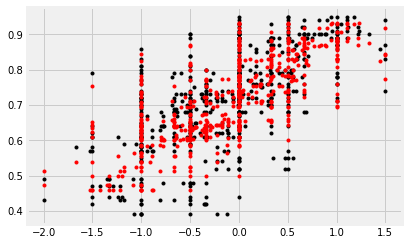

Model: ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
MAE: 0.1075 (17.06%) RMSE: 0.1353 (21.47%) R2 Score: -0.73%


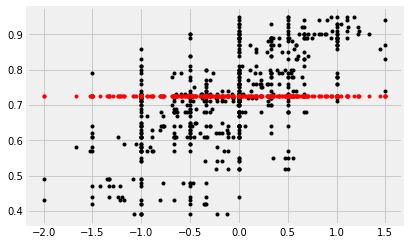

In [125]:
create_MLR_models(dataset = data_robust, 
                  X = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research'], 
                  y = 'Chance of Admit', 
                  test_size = 0.2)

Polynomial Regression Model, dataset=(400, 8), degree=2
MAE: 0.0515 (8.18%) RMSE: 0.0727 (11.54%) R2 Score: 70.89%


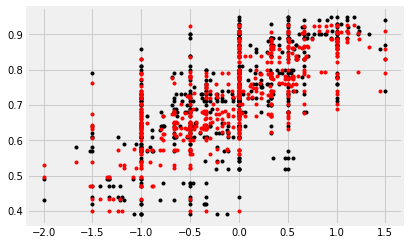

Polynomial Regression Model, dataset=(400, 8), degree=3
MAE: 0.0742 (11.78%) RMSE: 0.1155 (18.34%) R2 Score: 26.55%


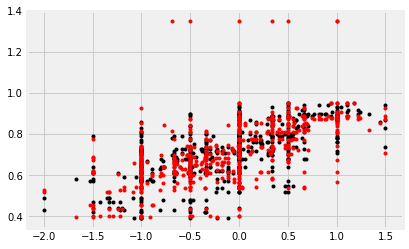

Polynomial Regression Model, dataset=(400, 8), degree=4
MAE: 0.6074 (96.41%) RMSE: 1.3663 (216.88%) R2 Score: -10175.87%


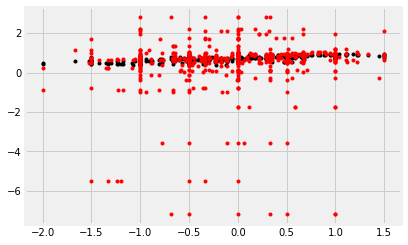

In [126]:
for i in range(2, 5):
    create_multivariate_polynomial_regression_model(dataset = data_robust, 
                                                    X = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 
                                                       'CGPA', 'Research'], 
                                                    y = 'Chance of Admit',
                                                    degree = i,
                                                    test_size = 0.2)

Polynomial Regression Model, degree=2
MAE: 0.0556 (8.82%) RMSE: 0.0769 (12.21%) R2 Score: 67.46%


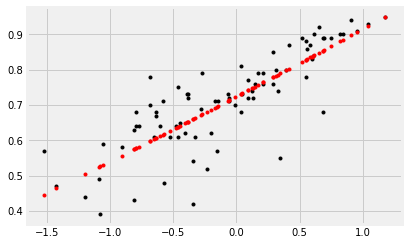

Polynomial Regression Model, degree=3
MAE: 0.0556 (8.82%) RMSE: 0.0769 (12.21%) R2 Score: 67.43%


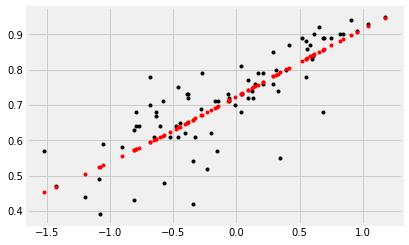

Polynomial Regression Model, degree=4
MAE: 0.055 (8.74%) RMSE: 0.0767 (12.18%) R2 Score: 67.6%


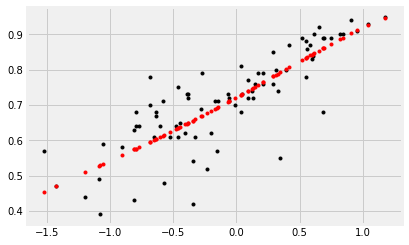

Polynomial Regression Model, degree=5
MAE: 0.0544 (8.64%) RMSE: 0.0764 (12.12%) R2 Score: 67.91%


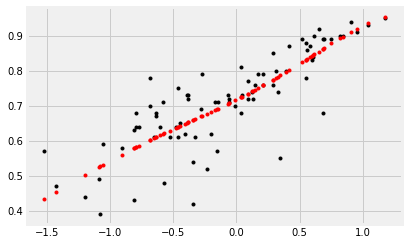

Polynomial Regression Model, degree=6
MAE: 0.0549 (8.72%) RMSE: 0.0765 (12.14%) R2 Score: 67.79%


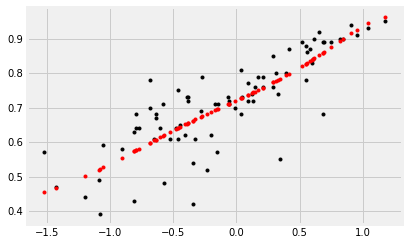

Polynomial Regression Model, degree=7
MAE: 0.0539 (8.56%) RMSE: 0.0756 (12.01%) R2 Score: 68.5%


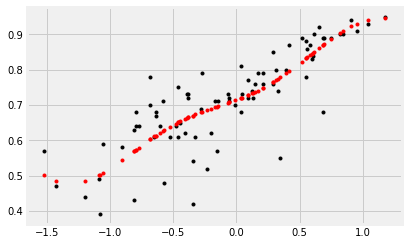

Polynomial Regression Model, degree=8
MAE: 0.0549 (8.71%) RMSE: 0.0765 (12.15%) R2 Score: 67.75%


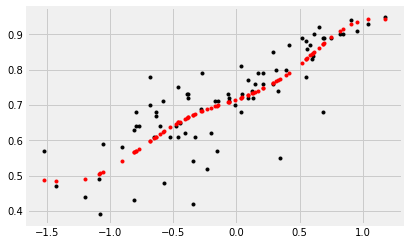

Polynomial Regression Model, degree=9
MAE: 0.0556 (8.83%) RMSE: 0.0775 (12.29%) R2 Score: 66.98%


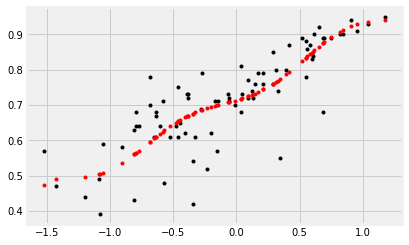

Polynomial Regression Model, degree=10
MAE: 0.0556 (8.83%) RMSE: 0.0775 (12.3%) R2 Score: 66.93%


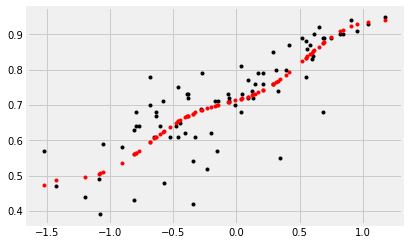

In [127]:
for i in range(2, 11):
    create_univariate_polynomial_regression_model(dataset=data_robust, X='CGPA', y='Chance of Admit', degree=i, test_size=0.2)

### Test Size 10%

#### Raw

Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
MAE: 0.0509 (8.09%) RMSE: 0.0727 (11.55%) R2 Score: 72.69%


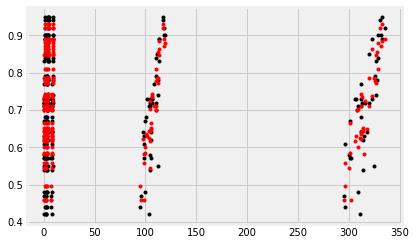

Model: Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
MAE: 0.0937 (14.87%) RMSE: 0.1205 (19.13%) R2 Score: 25.02%


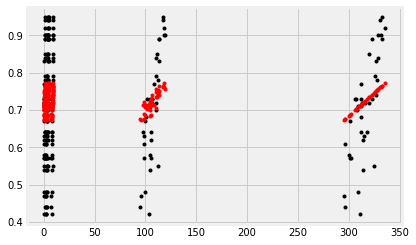

Model: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
MAE: 0.051 (8.09%) RMSE: 0.0726 (11.53%) R2 Score: 72.76%


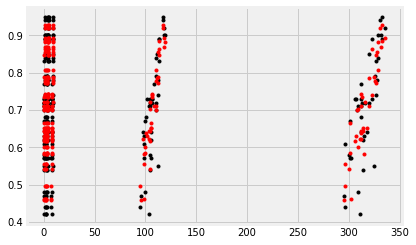

Model: ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
MAE: 0.0761 (12.08%) RMSE: 0.0972 (15.44%) R2 Score: 51.19%


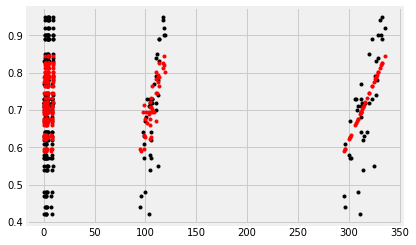

In [121]:
create_MLR_models(dataset = data, 
                  X = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research'], 
                  y = 'Chance of Admit', 
                  test_size = 0.1)

Polynomial Regression Model, dataset=(400, 8), degree=2
MAE: 0.0531 (8.43%) RMSE: 0.0741 (11.77%) R2 Score: 71.64%


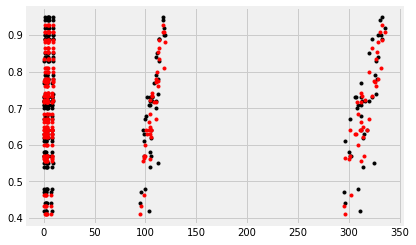

Polynomial Regression Model, dataset=(400, 8), degree=3
MAE: 0.0709 (11.25%) RMSE: 0.0874 (13.87%) R2 Score: 60.57%


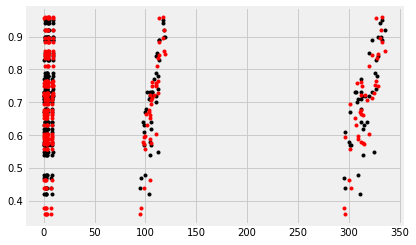

Polynomial Regression Model, dataset=(400, 8), degree=4
MAE: 0.3407 (54.08%) RMSE: 0.5593 (88.78%) R2 Score: -1514.88%


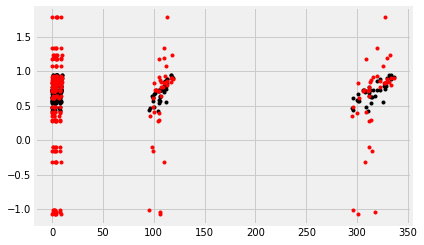

In [122]:
for i in range(2, 5):
    create_multivariate_polynomial_regression_model(dataset = data, 
                                                    X = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 
                                                       'CGPA', 'Research'], 
                                                    y = 'Chance of Admit',
                                                    degree = i,
                                                    test_size = 0.1)

Polynomial Regression Model, degree=2
MAE: 0.0541 (8.59%) RMSE: 0.0785 (12.47%) R2 Score: 68.15%


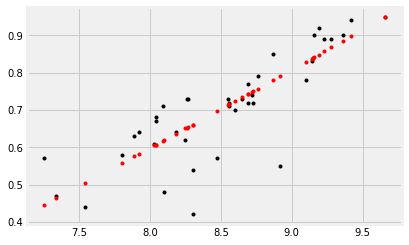

Polynomial Regression Model, degree=3
MAE: 0.0542 (8.6%) RMSE: 0.0784 (12.45%) R2 Score: 68.27%


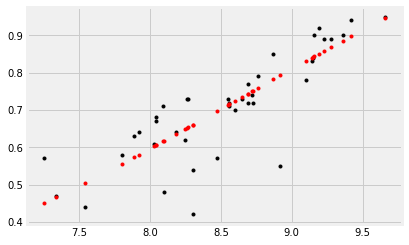

Polynomial Regression Model, degree=4
MAE: 0.0535 (8.49%) RMSE: 0.0779 (12.37%) R2 Score: 68.64%


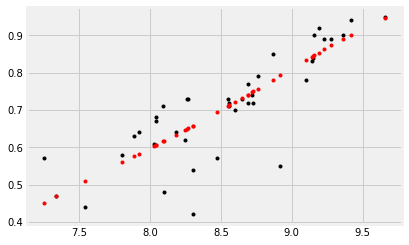

Polynomial Regression Model, degree=5
MAE: 0.0525 (8.33%) RMSE: 0.0779 (12.37%) R2 Score: 68.64%


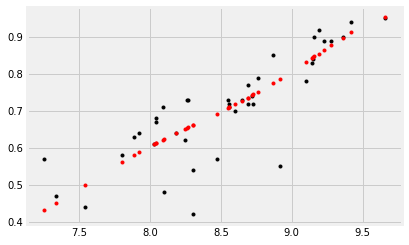

Polynomial Regression Model, degree=6
MAE: 0.0525 (8.33%) RMSE: 0.0777 (12.34%) R2 Score: 68.81%


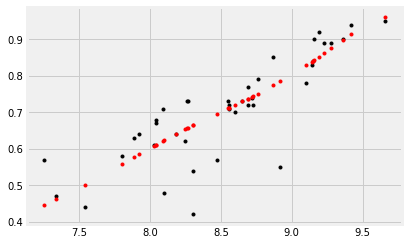

Polynomial Regression Model, degree=7
MAE: 0.0513 (8.14%) RMSE: 0.0763 (12.11%) R2 Score: 69.94%


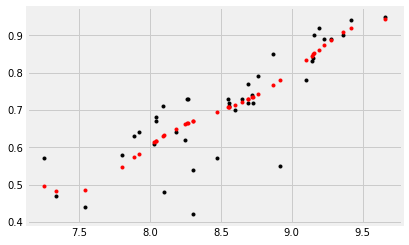

Polynomial Regression Model, degree=8
MAE: 0.0514 (8.16%) RMSE: 0.0765 (12.14%) R2 Score: 69.82%


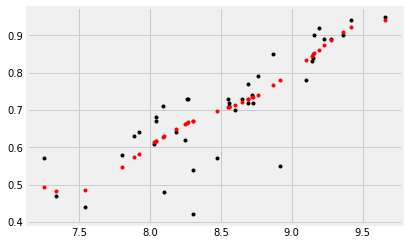

Polynomial Regression Model, degree=9
MAE: 0.0515 (8.17%) RMSE: 0.0765 (12.15%) R2 Score: 69.78%


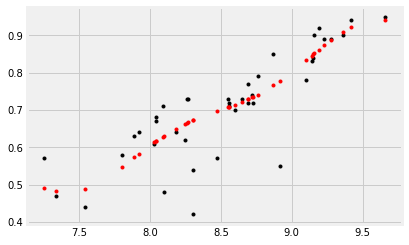

Polynomial Regression Model, degree=10
MAE: 0.0514 (8.16%) RMSE: 0.0765 (12.14%) R2 Score: 69.8%


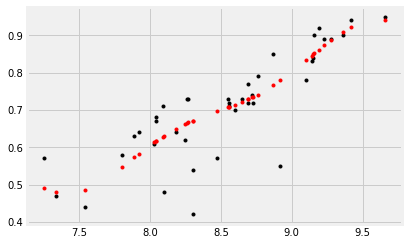

In [123]:
for i in range(2, 11):
    create_univariate_polynomial_regression_model(dataset=data, X='CGPA', y='Chance of Admit', degree=i, test_size=0.1)

#### Scaled

Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
MAE: 0.0509 (8.09%) RMSE: 0.0727 (11.55%) R2 Score: 72.69%


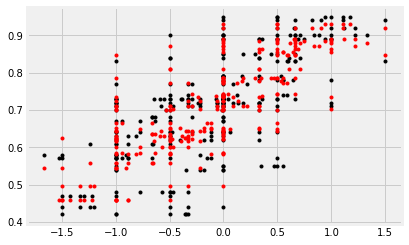

Model: Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
MAE: 0.1106 (17.56%) RMSE: 0.1404 (22.29%) R2 Score: -1.81%


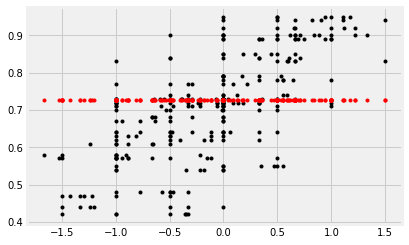

Model: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
MAE: 0.0509 (8.09%) RMSE: 0.0726 (11.53%) R2 Score: 72.77%


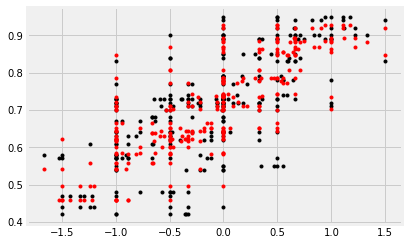

Model: ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
MAE: 0.1106 (17.56%) RMSE: 0.1404 (22.29%) R2 Score: -1.81%


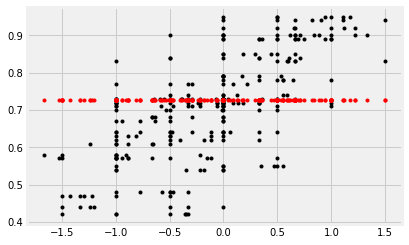

In [128]:
create_MLR_models(dataset = data_robust, 
                  X = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research'], 
                  y = 'Chance of Admit', 
                  test_size = 0.1)

Polynomial Regression Model, dataset=(400, 8), degree=2
MAE: 0.0531 (8.43%) RMSE: 0.0741 (11.77%) R2 Score: 71.64%


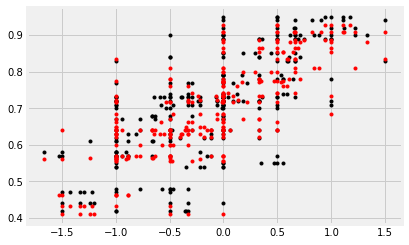

Polynomial Regression Model, dataset=(400, 8), degree=3
MAE: 0.0709 (11.25%) RMSE: 0.0874 (13.87%) R2 Score: 60.57%


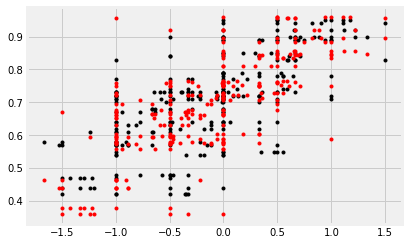

Polynomial Regression Model, dataset=(400, 8), degree=4
MAE: 0.3424 (54.35%) RMSE: 0.6053 (96.09%) R2 Score: -1791.43%


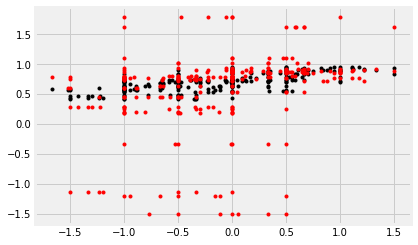

In [129]:
for i in range(2, 5):
    create_multivariate_polynomial_regression_model(dataset = data_robust, 
                                                    X = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 
                                                       'CGPA', 'Research'], 
                                                    y = 'Chance of Admit',
                                                    degree = i,
                                                    test_size = 0.1)

Polynomial Regression Model, degree=2
MAE: 0.0541 (8.59%) RMSE: 0.0785 (12.47%) R2 Score: 68.15%


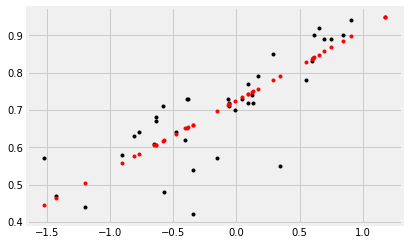

Polynomial Regression Model, degree=3
MAE: 0.0542 (8.6%) RMSE: 0.0784 (12.45%) R2 Score: 68.27%


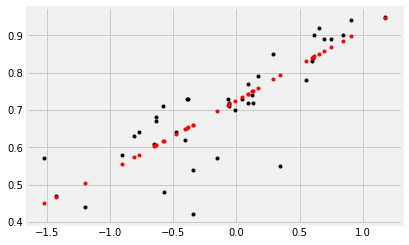

Polynomial Regression Model, degree=4
MAE: 0.0535 (8.49%) RMSE: 0.0779 (12.37%) R2 Score: 68.64%


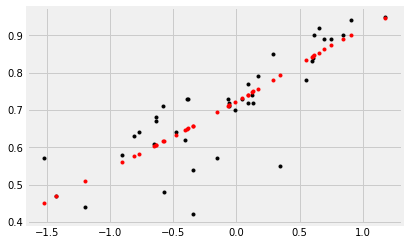

Polynomial Regression Model, degree=5
MAE: 0.0525 (8.33%) RMSE: 0.0779 (12.37%) R2 Score: 68.64%


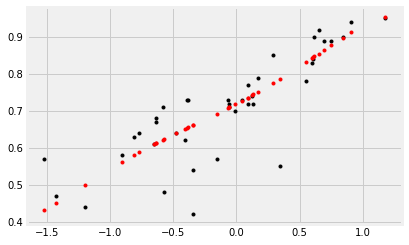

Polynomial Regression Model, degree=6
MAE: 0.0525 (8.33%) RMSE: 0.0777 (12.34%) R2 Score: 68.81%


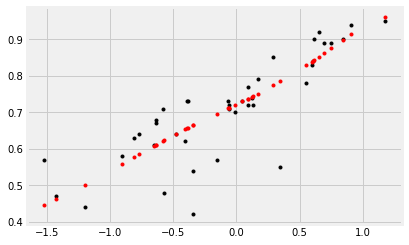

Polynomial Regression Model, degree=7
MAE: 0.0513 (8.14%) RMSE: 0.0763 (12.11%) R2 Score: 69.94%


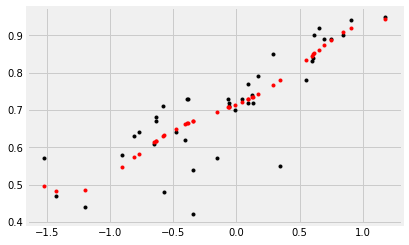

Polynomial Regression Model, degree=8
MAE: 0.0515 (8.17%) RMSE: 0.0766 (12.15%) R2 Score: 69.74%


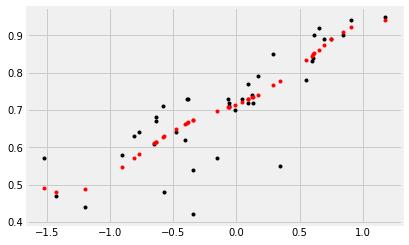

Polynomial Regression Model, degree=9
MAE: 0.0528 (8.39%) RMSE: 0.0777 (12.34%) R2 Score: 68.81%


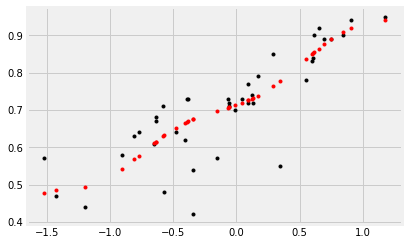

Polynomial Regression Model, degree=10
MAE: 0.053 (8.42%) RMSE: 0.0779 (12.36%) R2 Score: 68.72%


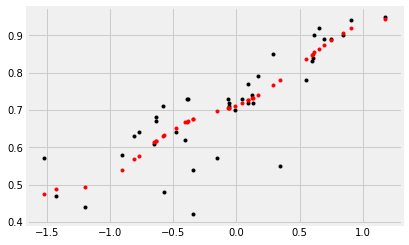

In [130]:
for i in range(2, 11):
    create_univariate_polynomial_regression_model(dataset=data_robust, X='CGPA', y='Chance of Admit', degree=i, test_size=0.1)

# Model Metrics

In [137]:
# recorded results in excel

summary = pd.read_excel('MLR results.xlsx')
summary

,Data,Split,Treatment,Deg,MAE,NMAE (%),RMSE,NRMSE (%),R2 (%)
0,Raw,80/20,LinearRegression,NaN,0.0501,7.95,0.0693,11.00,73.55
1,Raw,80/20,Lasso,NaN,0.0889,14.11,0.1152,18.28,27.01
2,Raw,80/20,Ridge,NaN,0.0499,7.92,0.0692,10.98,73.65
3,Raw,80/20,ElasticNet,NaN,0.0717,11.38,0.0957,15.19,49.56
4,Raw,80/20,Polynomial,2.0,0.0515,8.18,0.0727,11.54,70.89
5,Raw,80/20,CGPA Polynomial,7.0,0.0539,8.56,0.0756,12.01,68.50
6,Scaled,80/20,LinearRegression,NaN,0.0501,7.95,0.0693,11.00,73.55
7,Scaled,80/20,Lasso,NaN,0.1075,17.06,0.1353,21.47,-0.73
8,Scaled,80/20,Ridge,NaN,0.0500,7.93,0.0692,10.98,73.65
9,Scaled,80/20,ElasticNet,NaN,0.1075,17.06,0.1353,21.47,-0.73


In [140]:
summary.sort_values(by = 'R2 (%)', ascending = False)

,Data,Split,Treatment,Deg,MAE,NMAE (%),RMSE,NRMSE (%),R2 (%)
8,Scaled,80/20,Ridge,NaN,0.0500,7.93,0.0692,10.98,73.65
2,Raw,80/20,Ridge,NaN,0.0499,7.92,0.0692,10.98,73.65
0,Raw,80/20,LinearRegression,NaN,0.0501,7.95,0.0693,11.00,73.55
6,Scaled,80/20,LinearRegression,NaN,0.0501,7.95,0.0693,11.00,73.55
20,Scaled,90/10,Ridge,NaN,0.0509,8.09,0.0726,11.53,72.77
14,Raw,90/10,Ridge,NaN,0.0510,8.09,0.0726,11.53,72.76
18,Scaled,90/10,LinearRegression,NaN,0.0509,8.09,0.0727,11.55,72.69
12,Raw,90/10,LinearRegression,NaN,0.0509,8.09,0.0727,11.55,72.69
16,Raw,90/10,Polynomial,2.0,0.0531,8.43,0.0741,11.77,71.64
22,Scaled,90/10,Polynomial,2.0,0.0531,8.43,0.0741,11.77,71.64


In [141]:
summary.sort_values(by = 'NRMSE (%)')

,Data,Split,Treatment,Deg,MAE,NMAE (%),RMSE,NRMSE (%),R2 (%)
2,Raw,80/20,Ridge,NaN,0.0499,7.92,0.0692,10.98,73.65
8,Scaled,80/20,Ridge,NaN,0.0500,7.93,0.0692,10.98,73.65
0,Raw,80/20,LinearRegression,NaN,0.0501,7.95,0.0693,11.00,73.55
6,Scaled,80/20,LinearRegression,NaN,0.0501,7.95,0.0693,11.00,73.55
20,Scaled,90/10,Ridge,NaN,0.0509,8.09,0.0726,11.53,72.77
14,Raw,90/10,Ridge,NaN,0.0510,8.09,0.0726,11.53,72.76
4,Raw,80/20,Polynomial,2.0,0.0515,8.18,0.0727,11.54,70.89
10,Scaled,80/20,Polynomial,2.0,0.0515,8.18,0.0727,11.54,70.89
18,Scaled,90/10,LinearRegression,NaN,0.0509,8.09,0.0727,11.55,72.69
12,Raw,90/10,LinearRegression,NaN,0.0509,8.09,0.0727,11.55,72.69


In [145]:
summary.sort_values(by = 'NMAE (%)')

,Data,Split,Treatment,Deg,MAE,NMAE (%),RMSE,NRMSE (%),R2 (%)
2,Raw,80/20,Ridge,NaN,0.0499,7.92,0.0692,10.98,73.65
8,Scaled,80/20,Ridge,NaN,0.0500,7.93,0.0692,10.98,73.65
0,Raw,80/20,LinearRegression,NaN,0.0501,7.95,0.0693,11.00,73.55
6,Scaled,80/20,LinearRegression,NaN,0.0501,7.95,0.0693,11.00,73.55
20,Scaled,90/10,Ridge,NaN,0.0509,8.09,0.0726,11.53,72.77
18,Scaled,90/10,LinearRegression,NaN,0.0509,8.09,0.0727,11.55,72.69
14,Raw,90/10,Ridge,NaN,0.0510,8.09,0.0726,11.53,72.76
12,Raw,90/10,LinearRegression,NaN,0.0509,8.09,0.0727,11.55,72.69
17,Raw,90/10,CGPA Polynomial,7.0,0.0513,8.14,0.0763,12.11,69.94
23,Scaled,90/10,CGPA Polynomial,7.0,0.0513,8.14,0.0763,12.11,69.94


In [143]:
summary[summary['Treatment'] == 'LinearRegression']

,Data,Split,Treatment,Deg,MAE,NMAE (%),RMSE,NRMSE (%),R2 (%)
0,Raw,80/20,LinearRegression,NaN,0.0501,7.95,0.0693,11.00,73.55
6,Scaled,80/20,LinearRegression,NaN,0.0501,7.95,0.0693,11.00,73.55
12,Raw,90/10,LinearRegression,NaN,0.0509,8.09,0.0727,11.55,72.69
18,Scaled,90/10,LinearRegression,NaN,0.0509,8.09,0.0727,11.55,72.69


In [147]:
# Try to replicate treatment in original paper for fun, source as below

# Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, 
# IEEE International Conference on Computational Intelligence in Data Science 2019

Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
MAE: 0.0491 (7.8%) RMSE: 0.0693 (11.0%) R2 Score: 72.49%


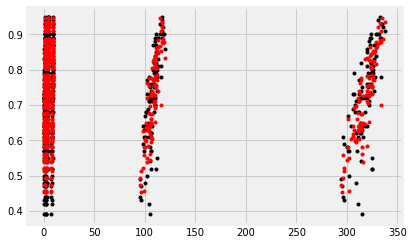

Model: Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
MAE: 0.0877 (13.92%) RMSE: 0.112 (17.77%) R2 Score: 28.18%


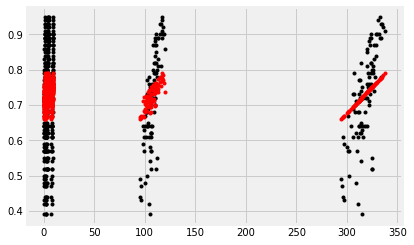

Model: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
MAE: 0.0488 (7.75%) RMSE: 0.069 (10.96%) R2 Score: 72.68%


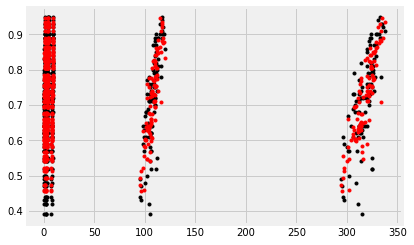

Model: ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
MAE: 0.0723 (11.47%) RMSE: 0.0951 (15.09%) R2 Score: 48.2%


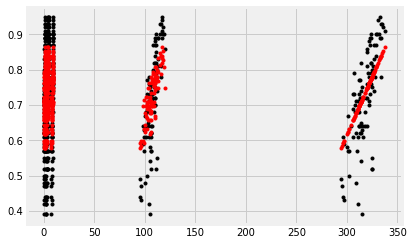

In [148]:
create_MLR_models(dataset = data, 
                  X = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research'], 
                  y = 'Chance of Admit', 
                  test_size = 0.25)

# "It is clear that Linear Regression performs the best on
# our dataset, with a low MSE and high R2 score, closely
# followed by Random Forest. This can be attributed to the
# linear dependencies of features in the dataset. Higher
# values of test scores, GPA and other factors generally
# result in greater chances of admission. The inclusion of a
# few outliers has influenced the Linear model to some
# extent.""